In [43]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report as cr 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import mean_squared_error
import math

This Project is about training a model for the Detection of disaster related news only as it can have a great impact on people so it can be used in various places like social media platforms, this model uses SVC algorithm which is trained on this data for regression purposes.

we start off with importing the required libraries

In [44]:
dataset = pd.read_csv("train.csv")

we use pandas to read the dataset and the dataset is completely filtered which means no empty or null values are there so no need to check for the null values.

In [45]:
dataset = dataset.sample(frac=1, random_state=42)
dataset.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


sample() is a function of the pandas dataframe and it is used to return a sample of the dataset where frac(fraction) is the fraction of the axis to return the objects from.

In [46]:
train_features = dataset['text'].to_numpy()
label = dataset['target'].to_numpy()

we take the required data for training from the dataset and then turn it into a numpy array using to_numpy()
in this case we want the text as the feature of our model and target column as the label 

In [47]:

train_sentences, test_sentences, train_labels, test_labels = train_test_split(train_features,label,test_size = 0.3, random_state=42)

using traiin_test_split() we split the data into two parts, one is for training and the other is for testing, here test size is 30 percentof the original dataset and random_state is used to seperate data into two parts randomly not jus from the starting.

In [48]:


model = Pipeline([
                    ("", TfidfVectorizer()), 
                    ('svc', SVC()) 
])

we will have to use the pipeline method as we are using two things so that the result of the first goes into the second.
by using tfidvectorizer, we can transform text into numbers which can be understood by the computer usinf tfidf and then we use SVC model to train it on the basis of the numbers from the first algo

In [49]:
model.fit(train_sentences,train_labels)

Pipeline(steps=[('', TfidfVectorizer()), ('svc', SVC())])

In [50]:
val_pred = model.predict(test_sentences)

predicting the values against the test dataset

In [51]:
print(cr(test_labels,val_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84      1261
           1       0.86      0.67      0.75      1023

    accuracy                           0.80      2284
   macro avg       0.81      0.79      0.79      2284
weighted avg       0.81      0.80      0.80      2284



[Text(0, 0.5, 'No Disaster'), Text(0, 1.5, 'Disaster')]

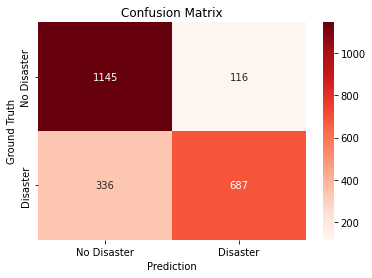

In [52]:
confusion_matrix = cm(test_labels,val_pred)
ax = sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap='Reds')
ax.set_title("Confusion Matrix")
ax.set_xlabel('Prediction')
ax.set_ylabel('Ground Truth')


ax.xaxis.set_ticklabels(['No Disaster','Disaster'])
ax.yaxis.set_ticklabels(['No Disaster','Disaster'])

plotting a confusion matrix prediction nd the ground truth using seaborn heatmap 
we are using the test labels and the predicted values
we do this for better understanding of our model predictions.

In [53]:
g=accuracy_score(test_labels,val_pred)
print(f"Your accuracy is: {round(g*100,2)}%")

Your accuracy is: 80.21%


accuracy of our model is 80.21%

In [54]:

mse = mean_squared_error(test_labels,val_pred)
print(f"mean squared error is {mse}")


mean squared error is 0.1978984238178634


mean squared error is 0.19